Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
- Examine Irish context:
- Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas 
dataframe and export to csv and json formats
- For all of the above variables, analyse the data, the trends and the relationships between 
them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to 
published climate models if atmospheric CO2 trends continue
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice coverage)

In [591]:
#importinng the necessaary libraries 
import numpy as np  
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sea

## Importing CO2 dataset(s)

This excel document contains data from 800k years in the past up to 2001. 
(Further adjustment to the data file will be completed later to include data up to 2022).

This data includes updated data for CO2 composite with the removal of analytical bias per Bereiter et al 2015. It replaces the older version of the data from Luthi et al 2008.

I have converted this excel file to a csv format so that it will be easier to use and all so all of the data will be in one uniform format.


In [592]:
IPCC1 = pd.read_excel ("Rough Work CO2/IPCCreport1.xlsx", sheet_name='CO2 Composite') #setting the sheet I want to use data from
  
# I am converting the excel file to csv file for ease of use and manipulation
IPCC1.to_csv ("Rough Work CO2/IPCC.csv") 
    
# reading the csv file and converting to dataframe object 
IPCC = pd.read_csv("Rough Work CO2/IPCC.csv", skiprows=15, header=None) # skipping first 15 rows as they do not contain actual data

IPCC = IPCC.iloc[:, 1:] # skipping first column as it just contains the row number; not actual data. The 1 specifies to skip column 0

IPCC.columns = ['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'] # setting titles of columns

IPCC.to_csv("Rough Work CO2/IPCC.csv", index=None) # saving the csv file with changes made


In [593]:
IPCC['Year'] = 1950 - IPCC['Gasage (yr BP)'] # to get year in actual values as it was measured in years its been since 1950
IPCC = IPCC.sort_values('Year', ascending=True)
IPCC = IPCC.iloc[:, 1: ] # removing first column as have year now calculated
IPCC = IPCC.iloc[:, [0, 2]] # only want first and 3rd column 
IPCC.to_csv("Rough Work CO2/IPCCCO2Data_Year.csv", index=False) # adding year column 

## Adding Mauna Loa CO2 data

In [594]:
MLC = pd.read_csv('Rough Work CO2/MaunaLoaCO2.txt', skiprows=88, header=None, delim_whitespace=True, engine='python') 
#true showing that the data in the text file is separated by whitespace; skipping 86 rows as only want data for 2000 onwards
MLC = MLC.iloc[:, :-1 ] 
MLC.columns = ['Year', 'Mean CO2']
MLC.to_csv (r'Rough Work CO2/MaunaLoaCO2.csv', index=None)

col = MLC.pop('Year')
MLC.insert(1, 'Year', col) #changing order of columns

MLC.to_csv('Rough Work CO2/UpdatedMaunaLoaCO2.csv', index=0)


In [595]:
with open('Rough Work CO2/IPCCCO2Data_Year.csv', 'a', newline='') as f1: # opening the file for appending
    writer = csv.writer(f1)
    with open('Rough Work CO2/UpdatedMaunaLoaCO2.csv', 'r') as f2: # opening the file to write it to f1
        reader = csv.reader(f2)
        next(reader) # to skip column titles when appending
        for row in reader:
            writer.writerow(row)

combined_data = pd.read_csv('Rough Work CO2/IPCCCO2Data_Year.csv')
col = combined_data.pop('CO2 (ppmv)')
combined_data.insert(1, 'CO2 (ppmv)', col)

combined_data.to_csv('Rough Work CO2/CombinedIPCCCO2Data_Year.csv', index=0)

# Temperature data

In [596]:
columns = ['Bag', 'ztop','Age','Deuterium', 'Temperature Anomoly'] #defining column titles 

data = pd.read_csv('Rough Work Temp/EpicaTemp.txt', skiprows=92, delim_whitespace=True, names=columns, engine='python') 
#true showing that the data in the text file is separated by whitespace

Epica = data[['Age', 'Temperature Anomoly']] # only want columns with Age and Temperature (other columns contain not applicable)

Epica.to_csv (r'Rough Work Temp/EpicaTemp.csv', index=None)


In [597]:
Epica['Year'] = 1950 - Epica['Age'] # to get year in actual values as it was measured in years since 1950
Epica = Epica.iloc[:, 1: ]
Epica.to_csv("Rough Work Temp/EpicaTempData_Year.csv", index=False)

C:\Users\rfeel\AppData\Local\Temp\ipykernel_29888\4086041975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Epica['Year'] = 1950 - Epica['Age'] # to get year in actual values as it was measured in years since 1950


In [598]:
#Mauna Loa temps  - not exactly from Mauna Loa but an approximate location
MLT = pd.read_csv('Rough Work Temp/HawaiiTemp.txt', delim_whitespace=True, engine='python') 
#true showing that the data in the text file is separated by whitespace
MLT.columns = ['Year', 'Average Annual Temperature (in degrees Celcius)']
MLT.to_csv (r'Rough Work Temp/HawaiiTemp.csv', index=None)

MLT.to_csv('Rough Work Temp/HawaiiTemp.csv', index=0)


In [599]:
Jouzel = pd.read_excel ("Rough Work Temp/JouzelTempData.xlsx", usecols=[2,5]) #only want relevant columns
Jouzel.to_csv ("Rough Work Temp/JouzelTempData.csv") 
 
Jouzel = pd.read_csv("Rough Work Temp/JouzelTempData.csv") 

Jouzel.drop('Unnamed: 0', axis=1, inplace=True) # removing unwanted index
#Jouzel = Jouzel.sort_values('EDC3béta', ascending=False)

Jouzel.to_csv("Rough Work Temp/JouzelTempData.csv", index=False) # saving the csv file back to the dataframe with the adjustments made

In [600]:
Jouzel['Year(for Temp)'] = 1950 - Jouzel['EDC3béta'] # to get year in actual values as it was measured in years since 1950
Jouzel = Jouzel.iloc[:, 1: ]
Jouzel.to_csv("Rough Work Temp/JouzelTempData_Year.csv", index=False)

In [601]:
df = pd.read_csv('Rough Work Temp/JouzelTempData_Year.csv')

column = 'temp'
df['celsius'] = df['temp'] - 273.15 # change from kelvin to celcius (conversion is kelvin figure minus 273.15)

average = df['celsius'][0:87].mean()
#The temperature anomaly in celsius is calculated.

df['anomaly'] = df['celsius'] - average # calculating the temp anomoly for each year (which is the temperature minus the average)

print(f'The average of the column {column} is {average}')

df.to_csv('Rough Work Temp/Jouzel_with_anomalies.csv', index=False)


The average of the column temp is -55.73850574712642


In [602]:
from csv import writer
#adding data for 2003, 2005, 2011, 2012, 2017 and 2020
# I have not added general global temperatures as these will differ from the Dome C temps which is one of the coldest places
# on earth
#Thus, using the normal global average will show a sudden shift in the most recent data and unduly alter the trend

# List containing the row data
row = ['Na', '2003', '-51.9', '3.838']
row2 = ['Na', '2005', '-54.741', '0.99' ]
row3 = ['Na', '2011', '-52.463', '3.275']
row4= ['Na', '2012', '-51.8', '3.93']
row5 = ['Na', '2017', '-51.3', '4.44']
row6 = ['Na', '2020', '-50.3', '5.43']



# Open the CSV file in append mode
with open('Rough Work Temp/Jouzel_with_anomalies.csv', 'a') as f_object:
    # Create a writer object
    writer_object = writer(f_object)
    # Add the row to the CSV file
    writer_object.writerow(row)
    writer_object.writerow(row2)
    writer_object.writerow(row3)
    writer_object.writerow(row4)
    writer_object.writerow(row5)
    writer_object.writerow(row6)

from https://en.tutiempo.net/climate/ws-898280.html. This is temperature data from Dome C II in Antartica taken at same place as Jouzels data.

In [603]:
JouzelAnomalies = pd.read_csv('Rough Work Temp/Jouzel_with_anomalies.csv')
JouzelAnomalies = JouzelAnomalies.sort_values('Year(for Temp)', ascending=True)

JouzelAnomalies.to_csv('Rough Work Temp/Jouzel_anomalies_updated.csv', index=False)


In [604]:
# newline is set to '' so that there is no space between the rows in the output csv
with open('Rough Work CO2/CombinedIPCCCO2Data_Year.csv', 'r') as t1, open('Rough Work Temp/Jouzel_anomalies_updated.csv', 'r') as t2, open('Combination.csv', 'w', newline='') as output:
     r1 = csv.reader(t1, delimiter=',')  # delimiter is so the output is separated by commas
     r2 = csv.reader(t2, delimiter=',')
     w = csv.writer(output, delimiter=',')
     for a, b in zip(r1, r2):
             w.writerow(a + b)

# above is adapted from https://stackoverflow.com/questions/45133919/merging-two-csv-files-together-side-by-side

# CO2 plotting

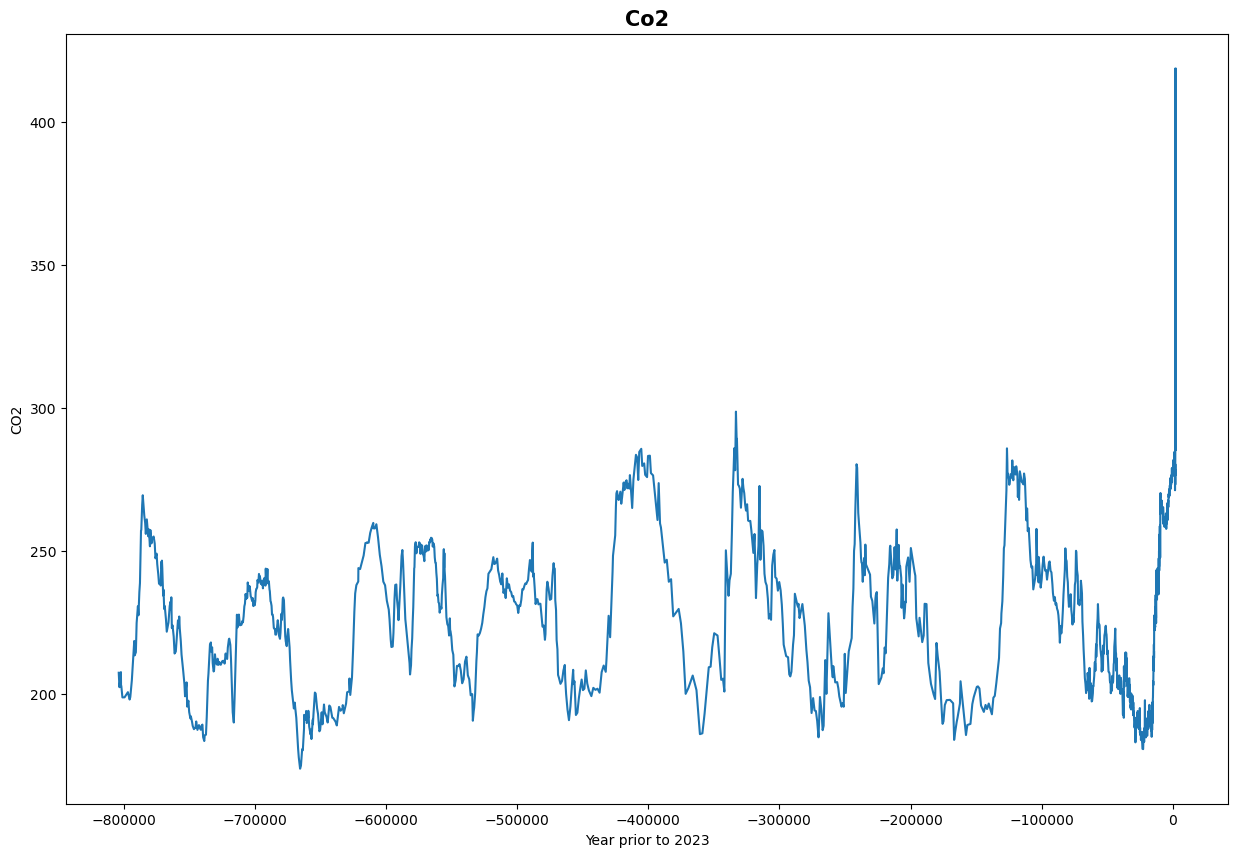

In [605]:
CombinedData = pd.read_csv('Combination.csv')
fig, ax = plt.subplots(figsize=(15, 10 ))

ax.plot(CombinedData['Year'], CombinedData['CO2 (ppmv)'])
ax.set_xlabel('Year prior to 2023')
ax.set_ylabel('CO2')

ax.set_title('Co2', weight ='bold', size=15)
plt.show()

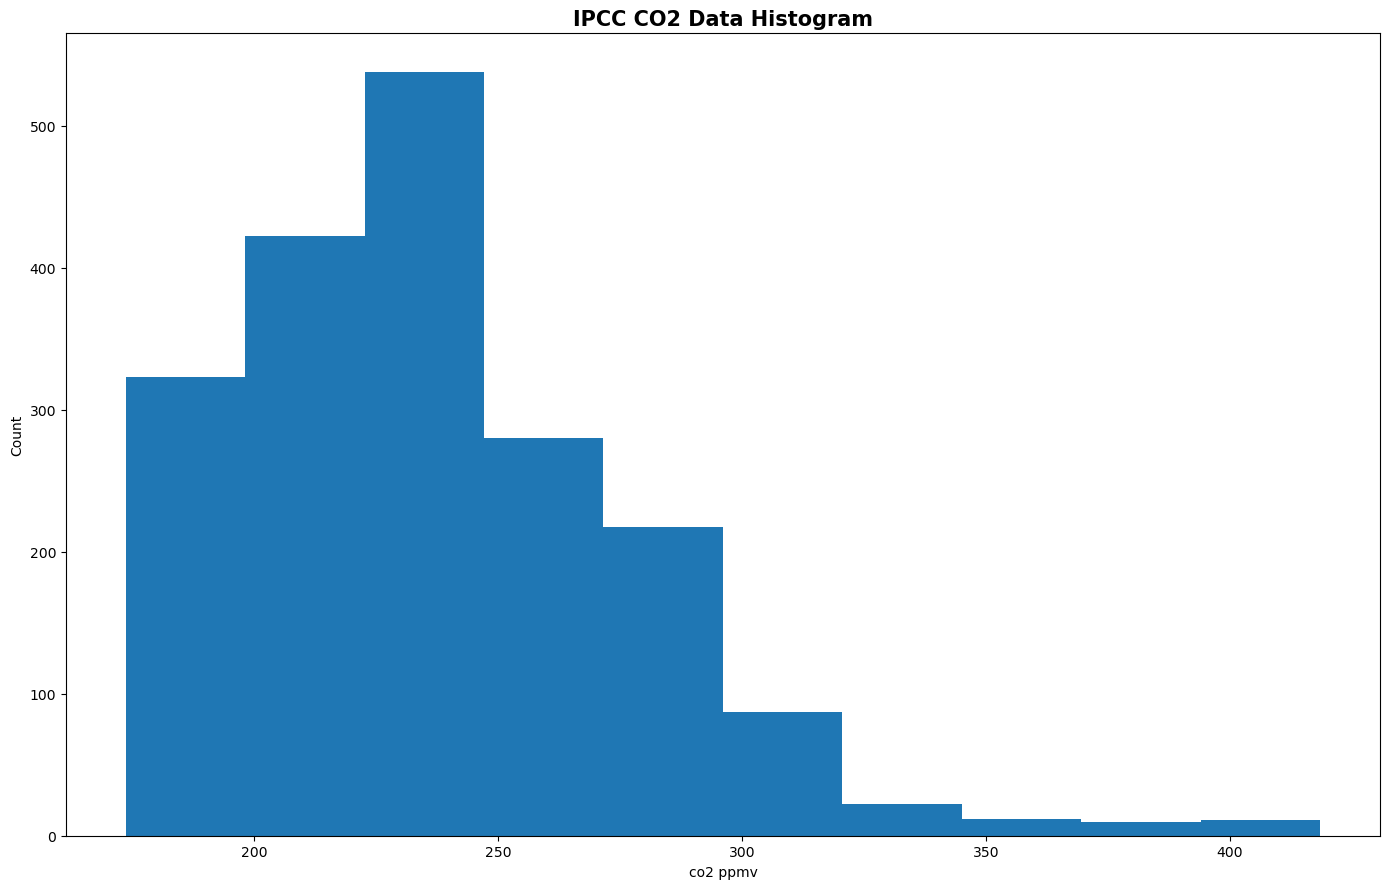

In [606]:
fig, ax = plt.subplots(figsize=(14,9))

ax.hist(CombinedData['CO2 (ppmv)'])
ax.set_xlabel('co2 ppmv')
ax.set_ylabel('Count')
ax.set_title('IPCC CO2 Data Histogram', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

# Temperature Plotting

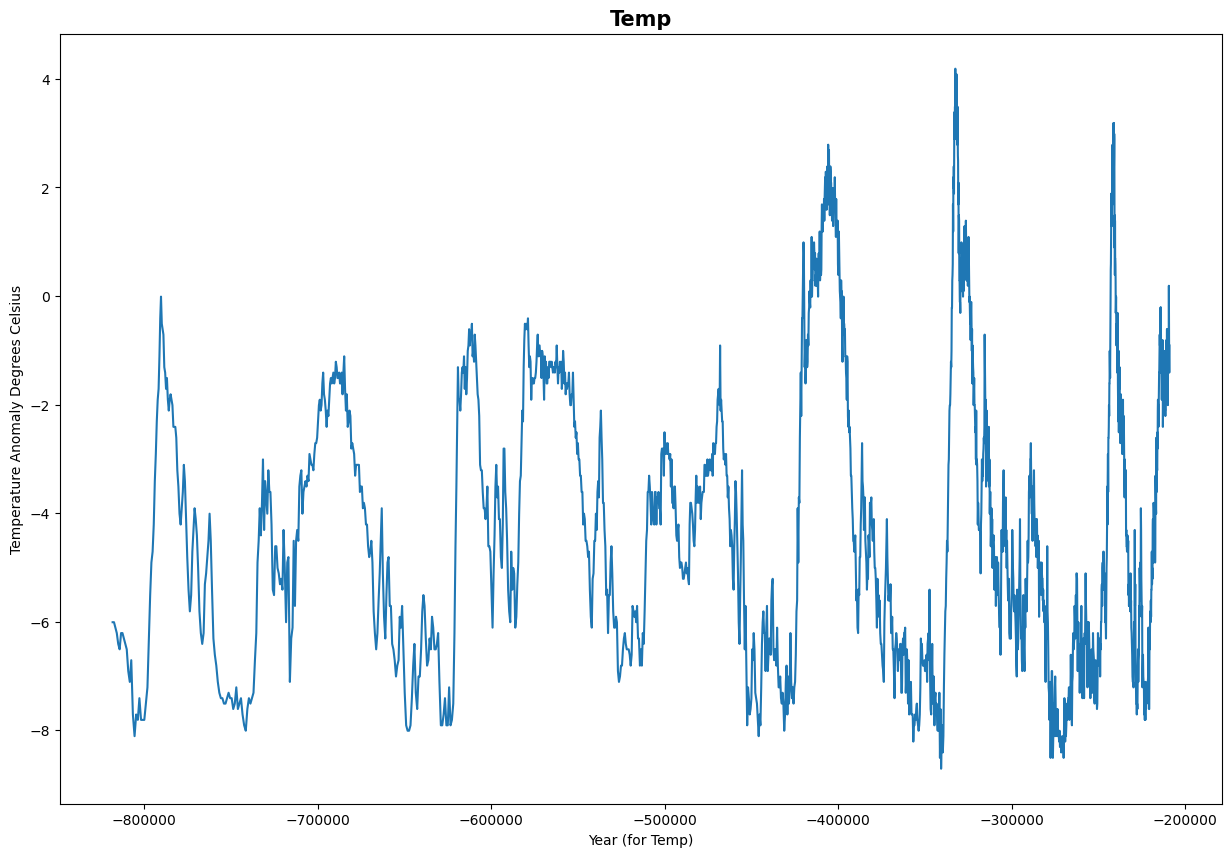

In [607]:
CombinedData = pd.read_csv('Combination.csv')
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(CombinedData['Year(for Temp)'], CombinedData['anomaly'])
ax.set_xlabel('Year (for Temp)')
ax.set_ylabel('Temperature Anomaly Degrees Celsius')

ax.set_title('Temp', weight ='bold', size=15)
plt.show()

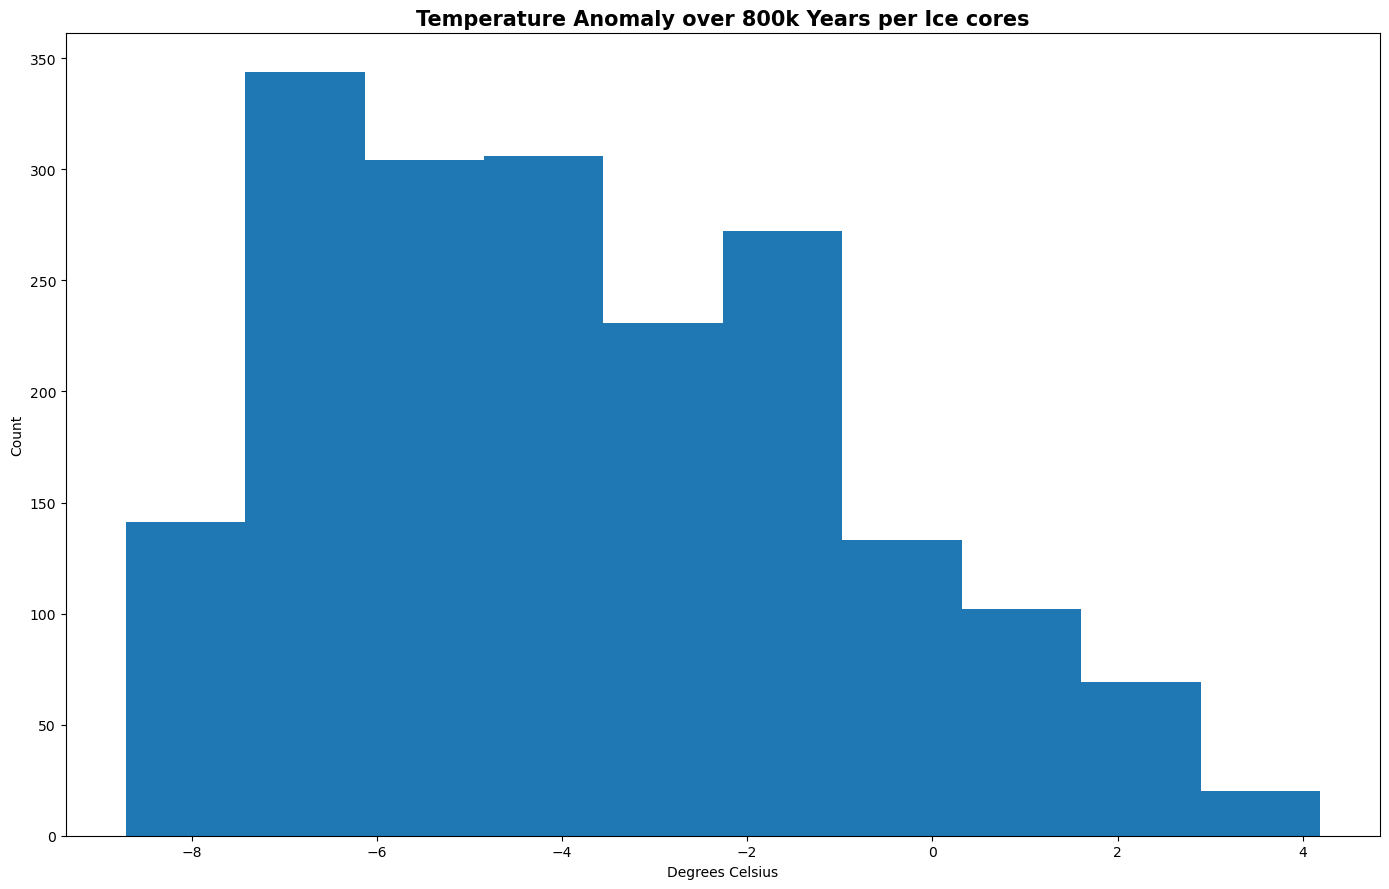

In [608]:
fig, ax = plt.subplots(figsize=(14,9))

ax.hist(CombinedData['anomaly'])
ax.set_xlabel('Degrees Celsius')
ax.set_ylabel('Count')
ax.set_title('Temperature Anomaly over 800k Years per Ice cores', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

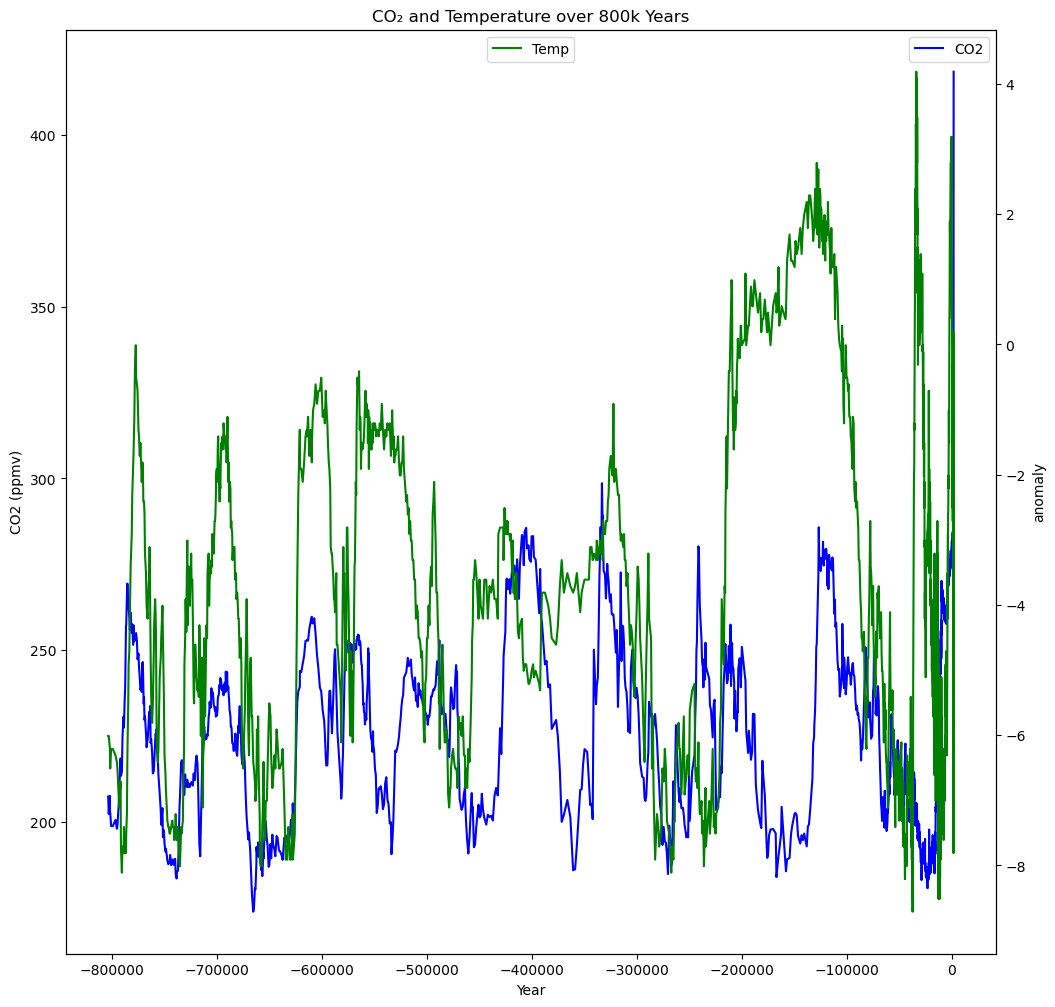

In [609]:
fig, ax = plt.subplots(figsize=(12,12))
sea.lineplot(x="Year", y="CO2 (ppmv)", data=CombinedData, color="b", label="CO2")
ax2 = plt.twinx()
sea.lineplot(x="Year", y="anomaly", data=CombinedData, color="g", ax=ax2, label="Temp")
plt.title("CO₂ and Temperature over 800k Years")
plt.legend(loc='upper center')

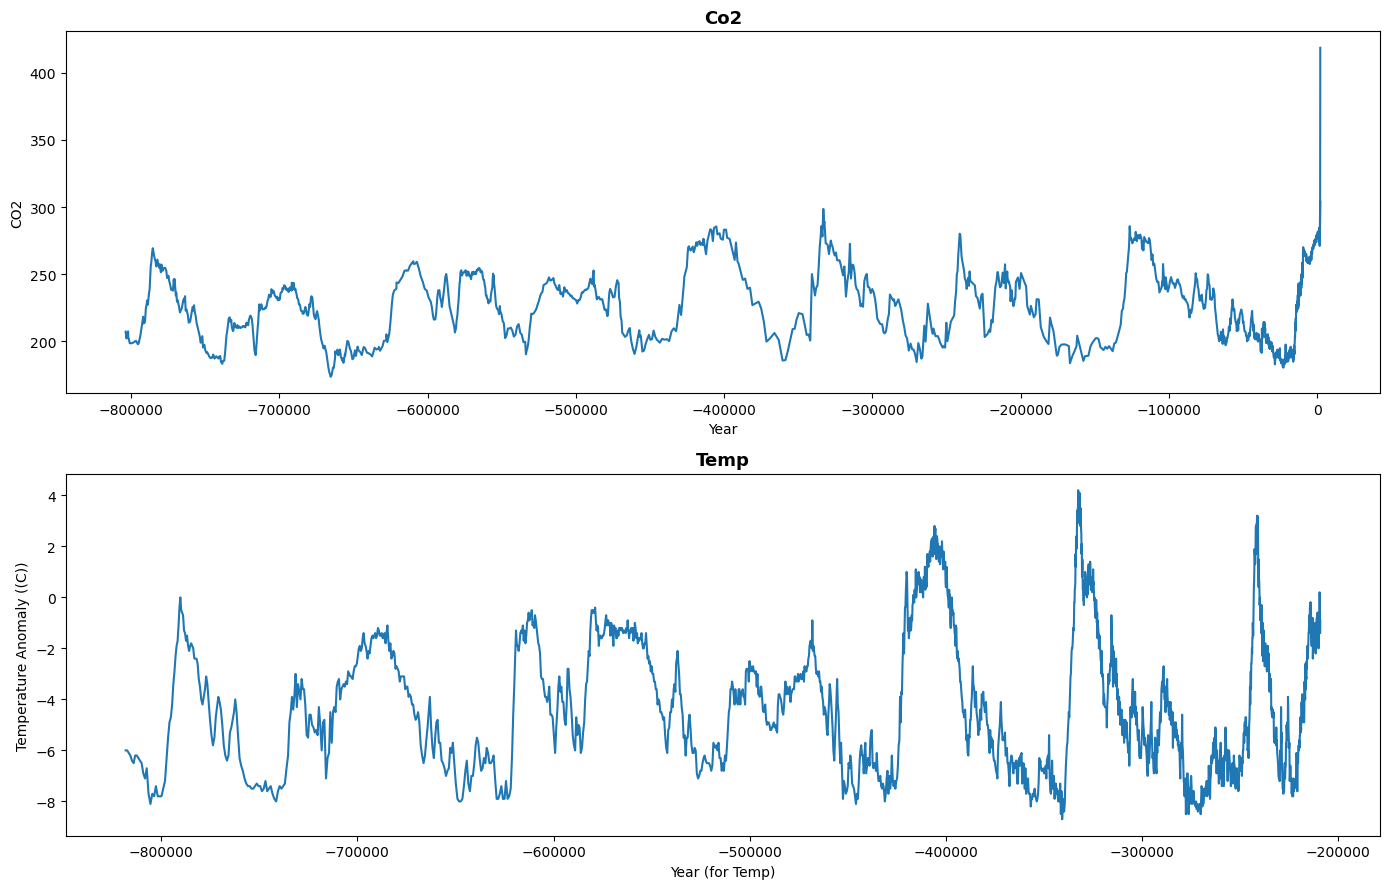

In [610]:
import matplotlib.pyplot as plt
import pandas as pd

CombinedData = pd.read_csv('Combination.csv')

# Creating an empty plot for the data
fig, axs = plt.subplots(2, figsize=(14, 9))

# Plotting the CO2 levels over the years on one axis
axs[0].plot(CombinedData['Year'], CombinedData['CO2 (ppmv)'])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('CO2')
axs[0].set_title('Co2', weight ='bold', size=13)

# Plotting the temperature anomalies over the years on the second axis
axs[1].plot(CombinedData['Year(for Temp)'], CombinedData['anomaly'])
axs[1].set_xlabel('Year (for Temp)')
axs[1].set_ylabel('Temperature Anomaly ((C))')
axs[1].set_title('Temp', weight ='bold', size=13)

plt.tight_layout()
plt.show()


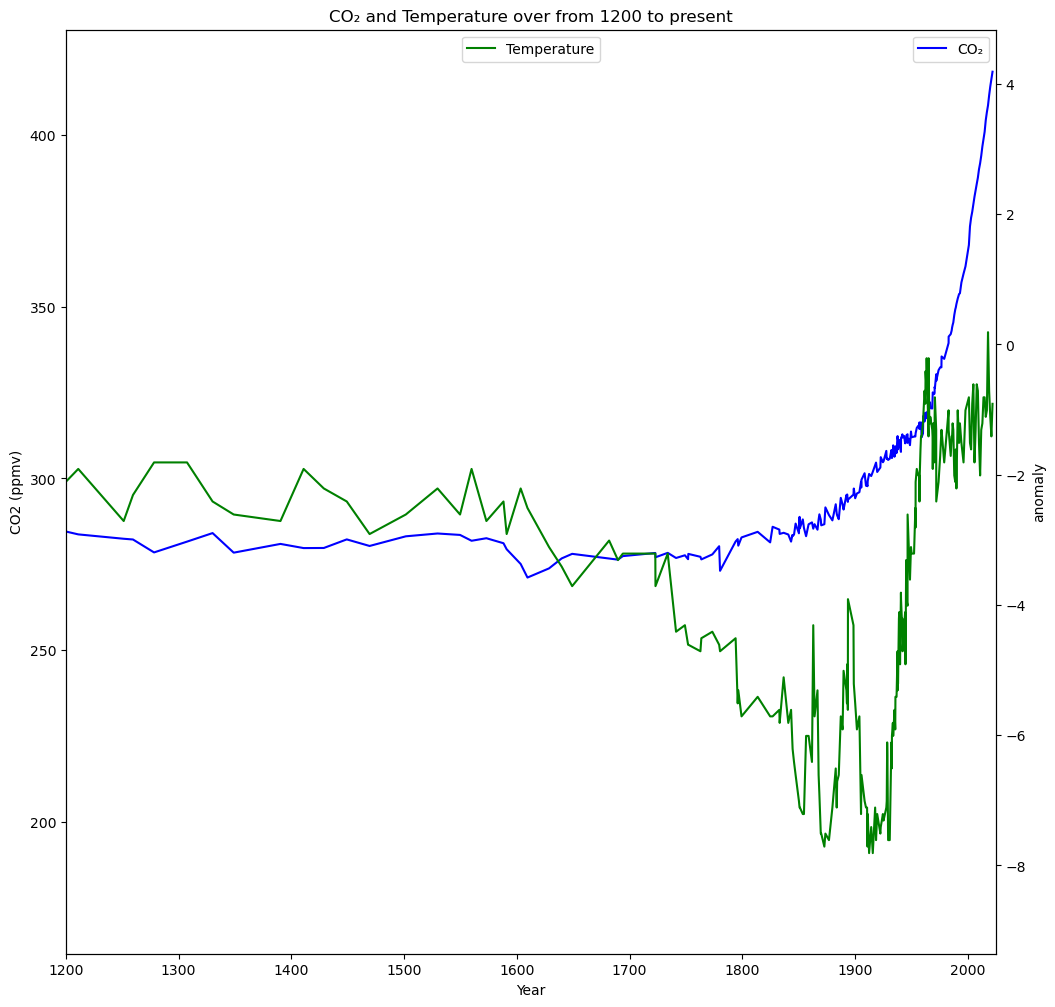

In [611]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sea.lineplot(x="Year", y="CO2 (ppmv)", data=CombinedData, color="b", ax=ax1, label="CO₂")
sea.lineplot(x="Year", y="anomaly", data=CombinedData, color="g", ax=ax2, label="Temperature")
ax1.set_xlim(1200, 2025)
ax2.set_xlim(1200, 2025)
plt.title("CO₂ and Temperature over from 1200 to present")
plt.legend(loc='upper center')

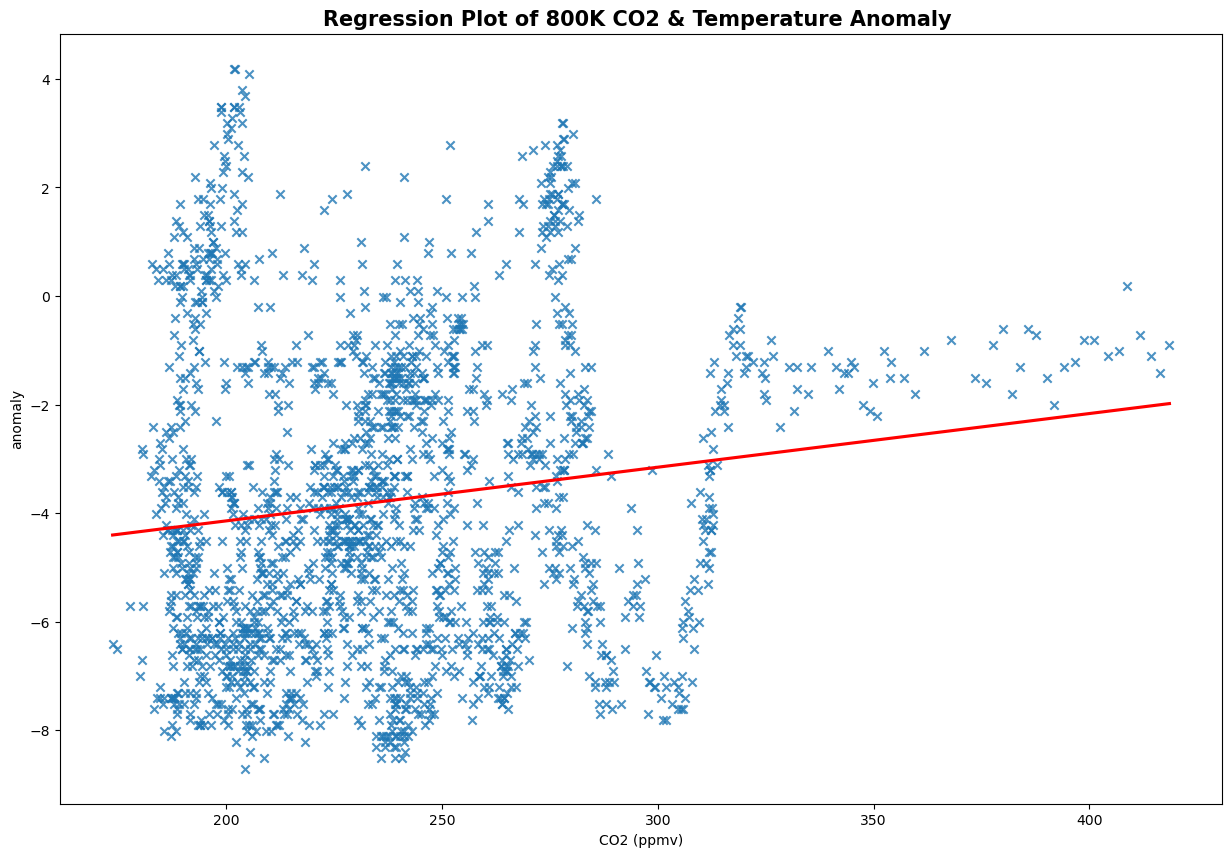

In [612]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sea.regplot(x='CO2 (ppmv)', y='anomaly', data=CombinedData, marker="x", ci=None, line_kws=dict(color="r"))
ax.set_title('Regression Plot of 800K CO2 & Temperature Anomaly ', weight = 'bold', size = 15)

plt.show()

## Methane data (3rd variable)

Column 1: EDC1999 depth (m)
Column 2: Gas Age (EDC3 gas age, years before 1950 AD)
Column 3: CH4 mean (ppbv)
Column 4: 1-sigma uncertainty (ppbv)
Column 5: Laboratory (b=Bern, g=Grenoble)

In [613]:
data = pd.read_csv('Rough Work Methane/Methanedatato1937.txt', skiprows=154, header=None, delim_whitespace=True, engine='python') 
#true showing that the data in the text file is separated by whitespace

data.columns = ['Depth', 'Gas Age', 'CH4 Mean', '1s', 'lab']

data.to_csv (r'Rough Work Methane/Methanedatato1937.csv', index=None)


In [614]:
Methane1937 = pd.read_csv('Rough Work Methane/Methanedatato1937.csv')

Methane1937['Year'] = 1950 - Methane1937['Gas Age'] # to get year in actual values as it was measured in years since 1950

Methane1937 = Methane1937.sort_values('Year', ascending=True)

Methane1937 = Methane1937.iloc[:, [2, 5]] # only want 3rd and 6th column (it is 0 indexed so starts counting at 0)

col = Methane1937.pop('Year')
Methane1937.insert(0, 'Year', col) # move year to first column
Methane1937.to_csv("Rough Work Methane/Methane_year.csv", index=False) 

In [615]:
Methane1980 = pd.read_csv('Rough Work Methane/Methanedatato1980.txt', engine='python') 
#true showing that the data in the text file is separated by whitespace

Methane1980.to_csv (r'Rough Work Methane/Methanedatato1980.csv', index=None)


In [616]:
with open('Rough Work Methane/Methane_year.csv', 'a', newline='') as f1: # opening the file for appending
    writer = csv.writer(f1)
    with open('Rough Work Methane/Methanedatato1980.csv', 'r') as f2: # opening the file to write it to f1
        reader = csv.reader(f2)
        next(reader) # to skip column titles when appending
        for row in reader:
            writer.writerow(row)

In [617]:
upto2022Methane = pd.read_csv('Rough Work Methane/Methanedatato2022.txt', skiprows=45, engine='python', sep='\s+') 
#sep is used to show that txt file is separated by spaces instead of comma so csv recognises correct columns

upto2022Methane = upto2022Methane.iloc[:, :-1 ]
upto2022Methane.to_csv (r'Rough Work Methane/Methanedatato2022.csv', index=None)


In [618]:

with open('Rough Work Methane/Methane_year.csv', 'a', newline='') as f1: # opening the file for appending
    writer = csv.writer(f1)
    with open('Rough Work Methane/Methanedatato2022.csv', 'r') as f2: # opening the file to write it to f1
        reader = csv.reader(f2)
        next(reader) # to skip column titles when appending
        for row in reader:
            writer.writerow(row)
# all the methane data is now included in one csv file called Methane_year.csv

### Methane Plotting

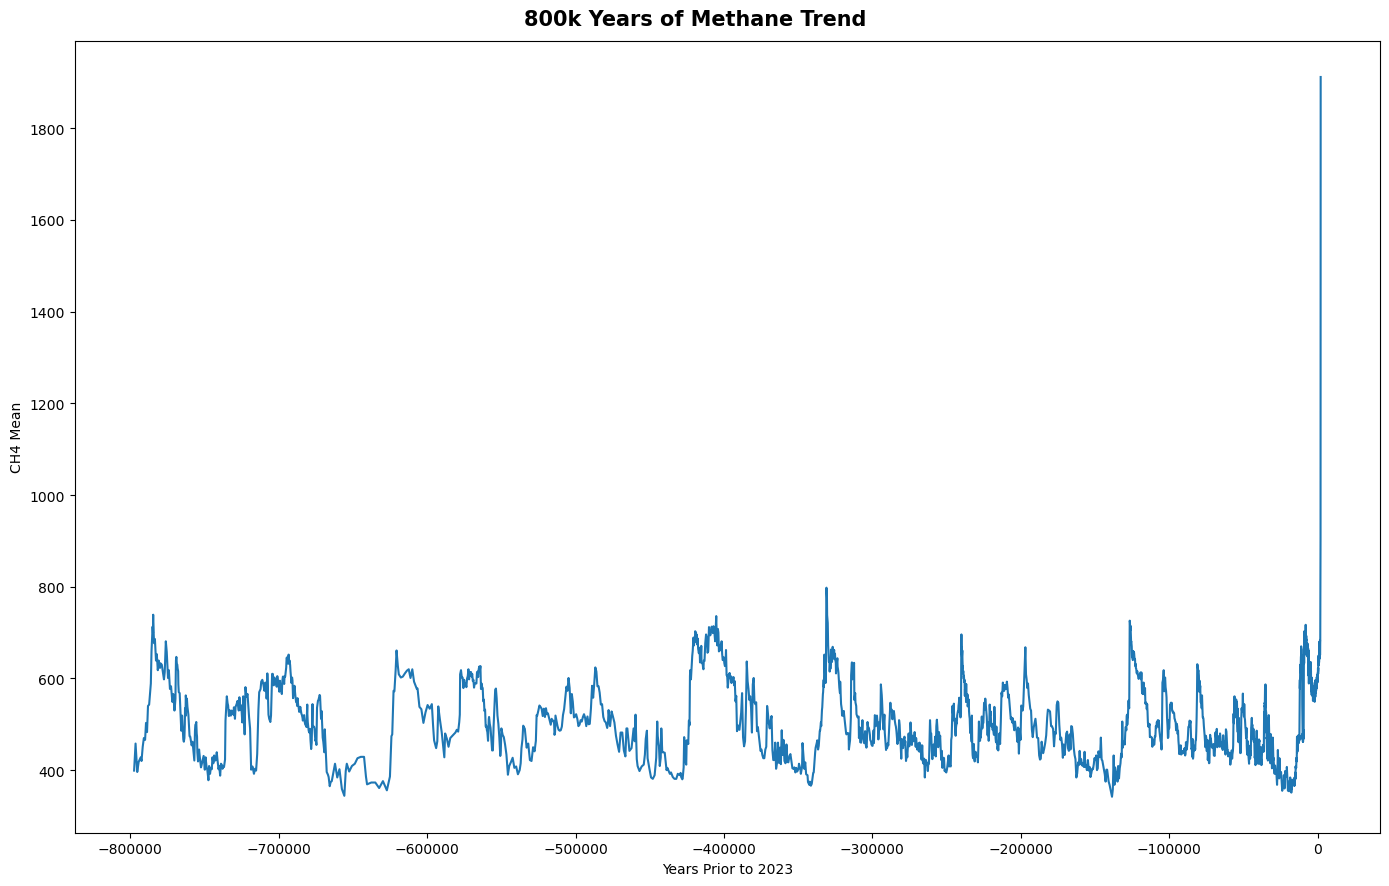

In [619]:
CombinedMethane = pd.read_csv('Rough Work Methane/Methane_year.csv')
fig, ax = plt.subplots(figsize=(14, 9))

ax.plot(CombinedMethane['Year'], CombinedMethane['CH4 Mean'])

ax.set_xlabel('Years Prior to 2023')
ax.set_ylabel('CH4 Mean')
plt.suptitle('800k Years of Methane Trend', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

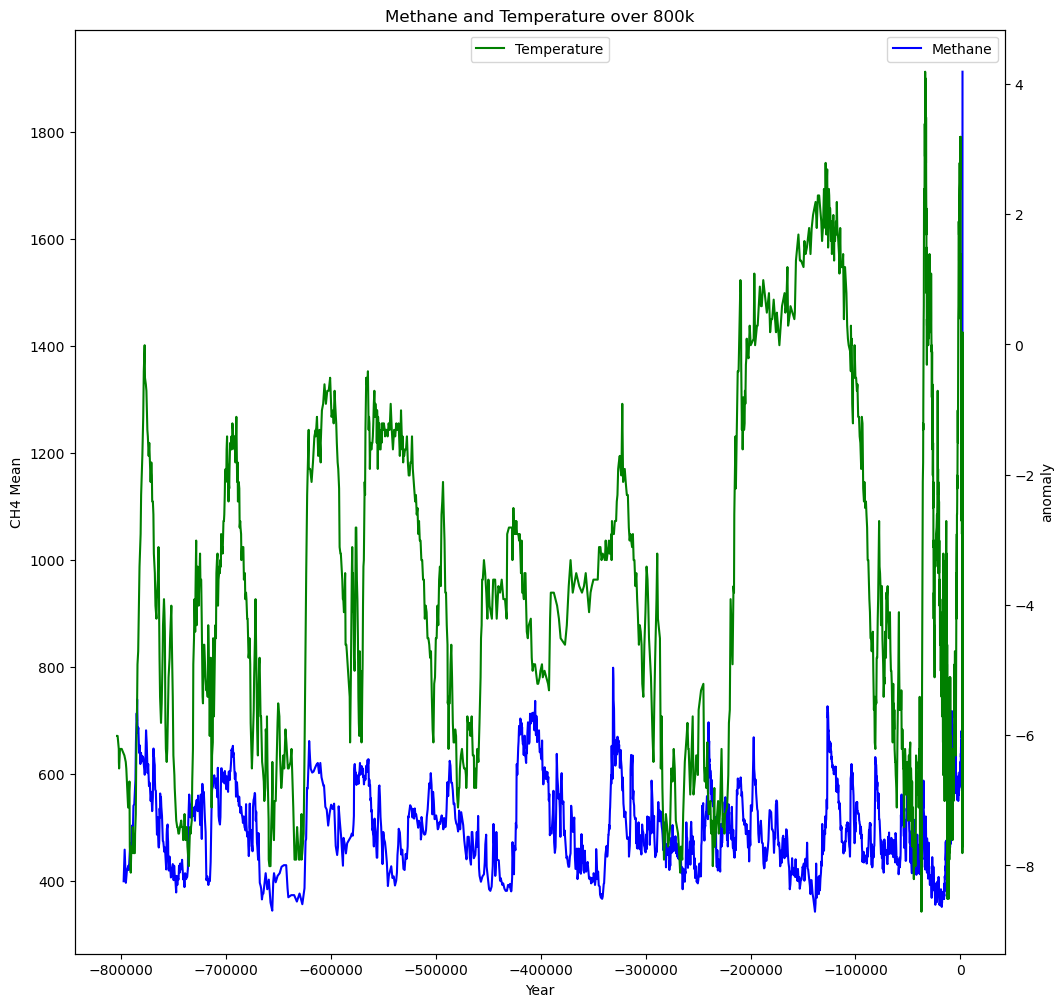

In [620]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sea.lineplot(x="Year", y="CH4 Mean", data=CombinedMethane, color="b", ax=ax1, label="Methane")
sea.lineplot(x="Year", y="anomaly", data=CombinedData, color="g", ax=ax2, label="Temperature")
plt.title("Methane and Temperature over 800k")
plt.legend(loc='upper center')

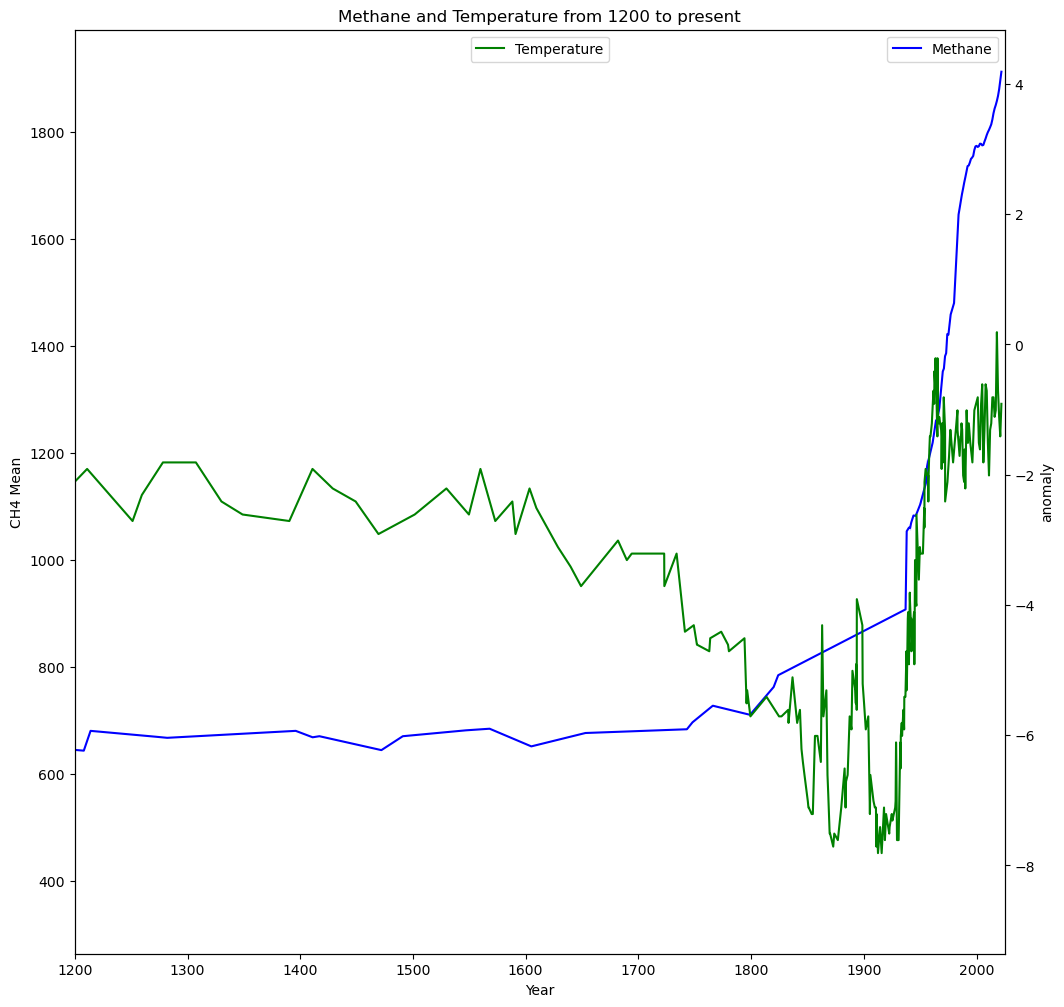

In [621]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sea.lineplot(x="Year", y="CH4 Mean", data=CombinedMethane, color="b", ax=ax1, label="Methane")
sea.lineplot(x="Year", y="anomaly", data=CombinedData, color="g", ax=ax2, label="Temperature")
ax1.set_xlim(1200, 2025)
ax2.set_xlim(1200, 2025)
plt.title("Methane and Temperature from 1200 to present")
plt.legend(loc='upper center')

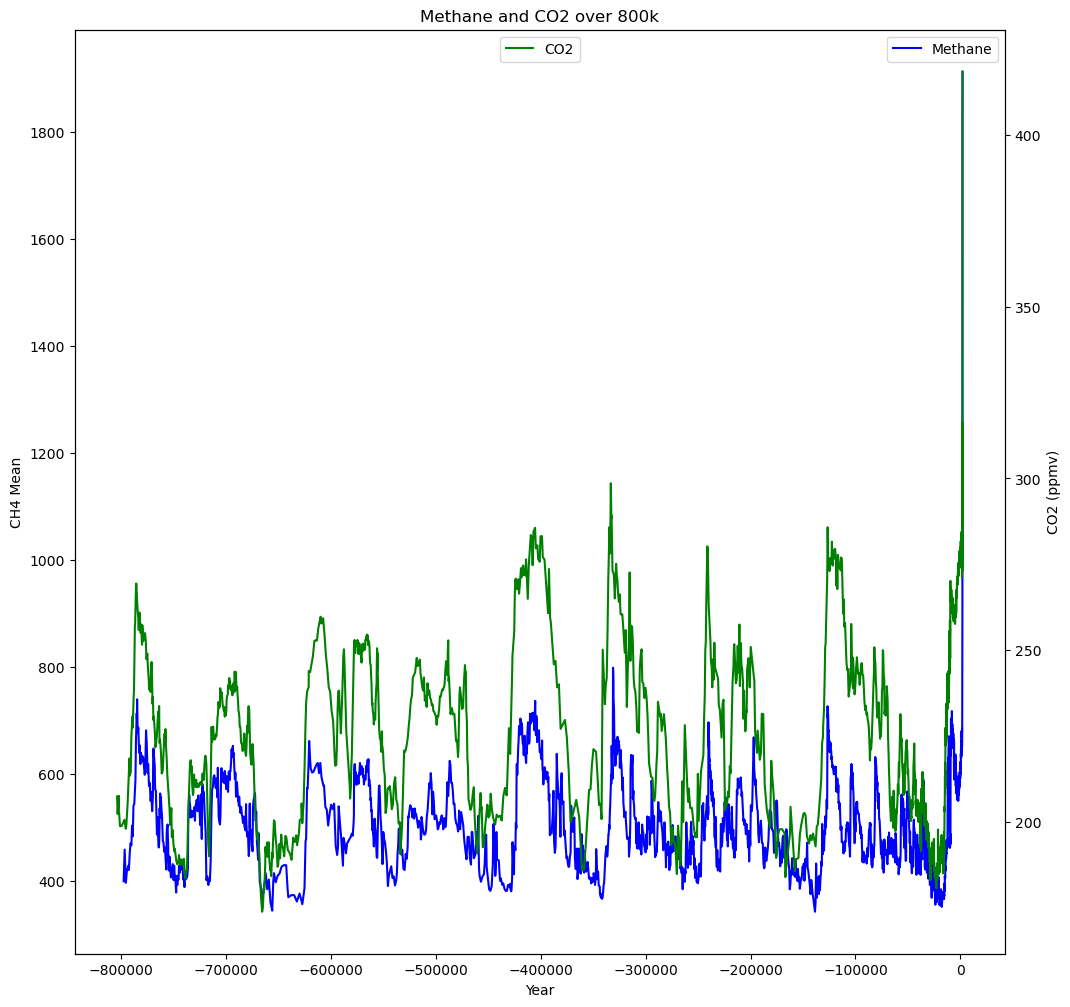

In [622]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sea.lineplot(x="Year", y="CH4 Mean", data=CombinedMethane, color="b", ax=ax1, label="Methane")
sea.lineplot(x="Year", y="CO2 (ppmv)", data=CombinedData, color="g", ax=ax2, label="CO2")
plt.title("Methane and CO2 over 800k")
plt.legend(loc='upper center')

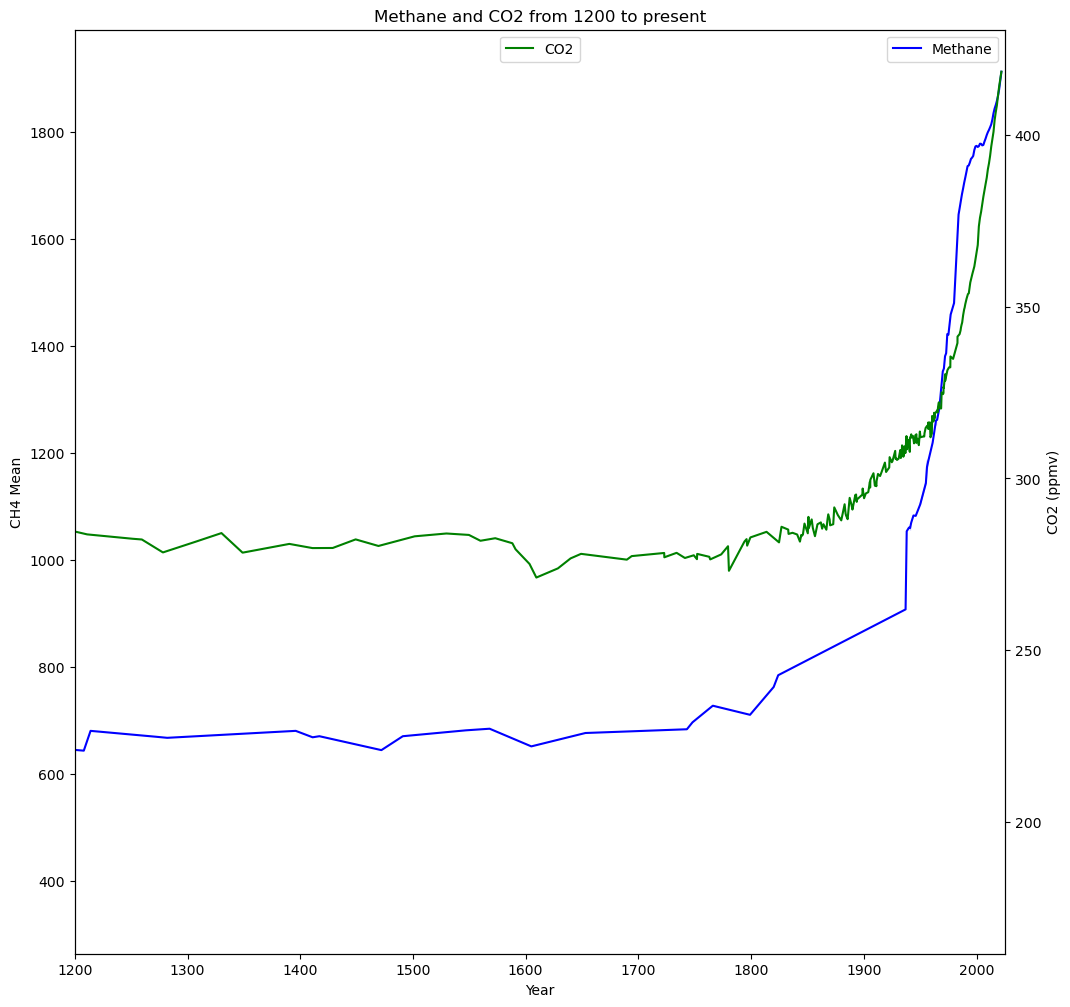

In [623]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sea.lineplot(x="Year", y="CH4 Mean", data=CombinedMethane, color="b", ax=ax1, label="Methane")
sea.lineplot(x="Year", y="CO2 (ppmv)", data=CombinedData, color="g", ax=ax2, label="CO2")
ax1.set_xlim(1200, 2025)
ax2.set_xlim(1200, 2025)
plt.title("Methane and CO2 from 1200 to present")
plt.legend(loc='upper center')

# Irish context 

In [624]:
# Read and store content of an excel file  
IrishData = pd.read_excel("dataDublinAirport.xlsx") 
  
# Writing the excel file into csv file 
IrishData.to_csv("dataDublinAirport.csv", index=None) 


IrishData = pd.read_csv("dataDublinAirport.csv", skiprows=19) # skipping first 15 rows as they do not contain actual data
IrishData = IrishData.iloc[:, [0, 1, 2, 7]] # only want first and 3rd column 

IrishData.to_csv("temp&rainDublinAirport.csv", index=None) # saving the csv file back to the dataframe with the adjustments made


In [625]:
TempDatafrom1901 = pd.read_excel("Annualtempfrom1901.xlsx") 
  
# Writing the excel file into csv file 
TempDatafrom1901.to_csv("Annualtempfrom1901.csv", index=None) 

TempDatafrom1901 = pd.read_csv('Annualtempfrom1901.csv')

# average temperature from 1940-1955 is 9.43 degrees celcius
# I will use this to take this degrees from the temperature mean each year to get the temperature anomaly

TempDatafrom1901['Anomoly'] = TempDatafrom1901['Annual Mean Temperature '] - 9.43

TempDatafrom1901['Anomoly'] = TempDatafrom1901['Anomoly']

TempDatafrom1901.to_csv('CompleteIrishTemperatures1900-2022.csv', index=None)


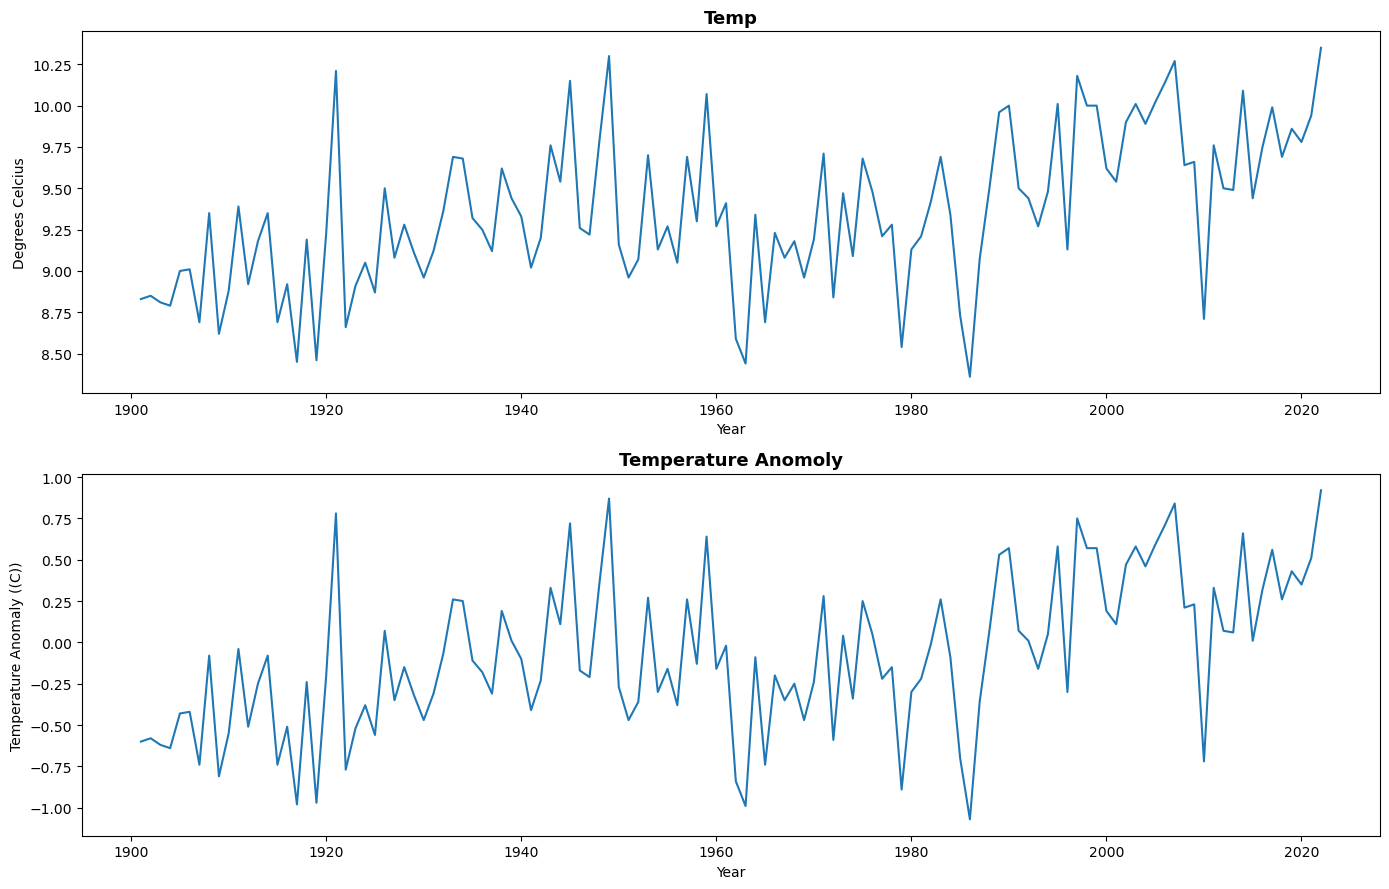

In [626]:
CompleteIrishTemperaturesfrom1900 = pd.read_csv('CompleteIrishTemperatures1900-2022.csv')
fig, axs = plt.subplots(2, figsize=(14, 9))

axs[0].plot(CompleteIrishTemperaturesfrom1900['Year'], CompleteIrishTemperaturesfrom1900['Annual Mean Temperature '], label = 'Mean Temperature')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Degrees Celcius')
axs[0].set_title('Temp', weight ='bold', size=13)

axs[1].plot(CompleteIrishTemperaturesfrom1900['Year'], CompleteIrishTemperaturesfrom1900['Anomoly'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Temperature Anomaly ((C))')
axs[1].set_title('Temperature Anomoly', weight ='bold', size=13)

plt.tight_layout()
plt.show()

In [627]:
RainDatafrom1901 = pd.read_excel("annualrain1901-2022.xlsx") 
RainDatafrom1901.to_csv("Annualrainfrom1901.csv", index=None) 

RainDatafrom1901 = pd.read_csv('Annualrainfrom1901.csv')

# average rainfall from 1940-1955 is 1128.79
# I will use this to take this from the rain mean each year to get the rainfall anomaly

RainDatafrom1901['Anomoly'] = RainDatafrom1901['Annual Mean Precipitation '] - 1128.79

RainDatafrom1901['Anomoly'] = RainDatafrom1901['Anomoly']

RainDatafrom1901.to_csv ('CompleteIrishRainfall1900-2022.csv', index=None)

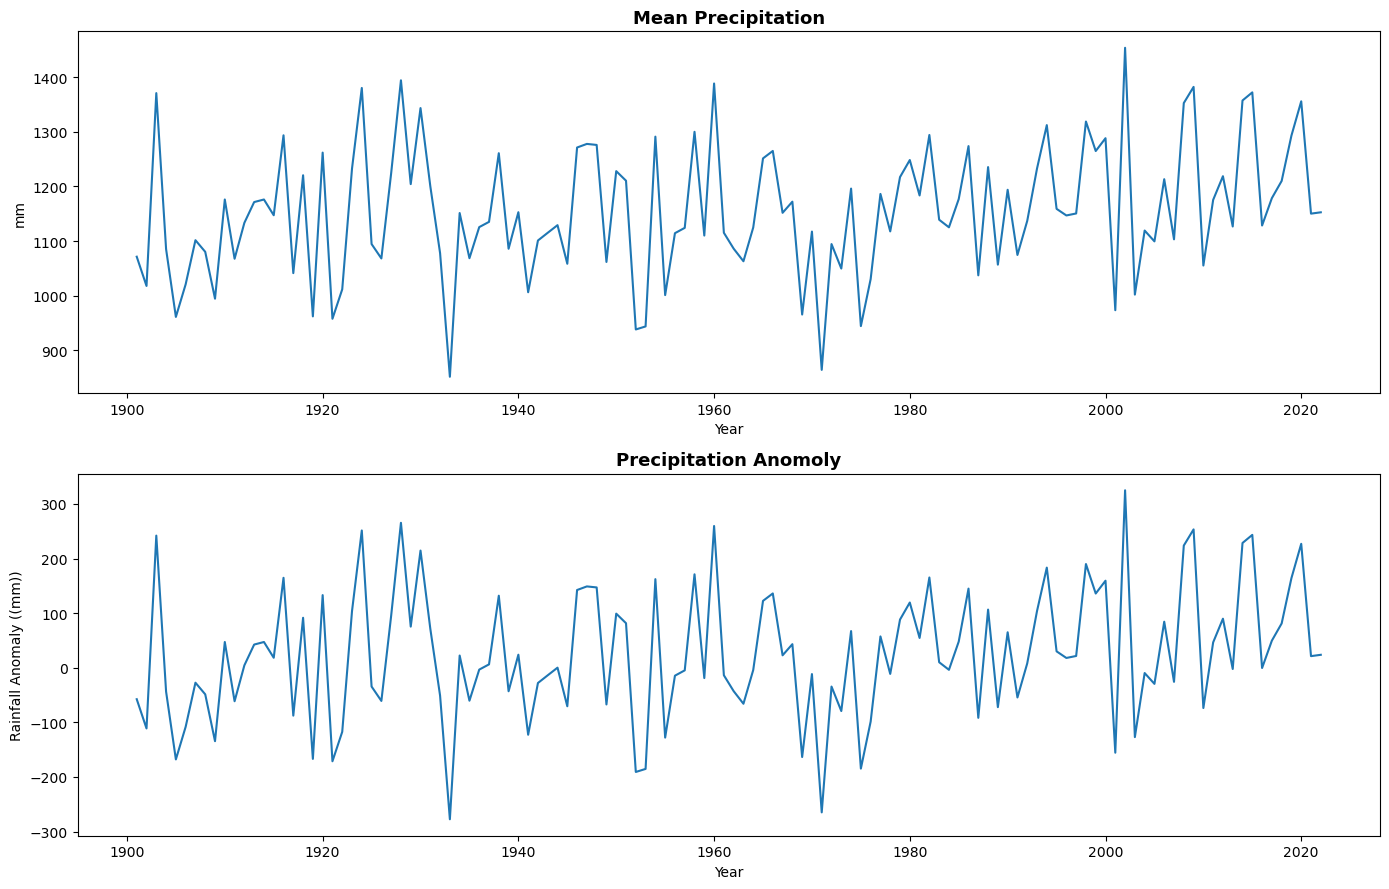

In [628]:
CompleteRainDatafrom1901 = pd.read_csv('CompleteIrishRainfall1900-2022.csv')
fig, axs = plt.subplots(2, figsize=(14, 9))

axs[0].plot(CompleteRainDatafrom1901['Year'], CompleteRainDatafrom1901['Annual Mean Precipitation '], label = 'Mean Precipitation')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('mm')
axs[0].set_title('Mean Precipitation', weight ='bold', size=13)

axs[1].plot(CompleteRainDatafrom1901['Year'], CompleteRainDatafrom1901['Anomoly'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Rainfall Anomaly ((mm))')
axs[1].set_title('Precipitation Anomoly', weight ='bold', size=13)

plt.tight_layout()
plt.show()

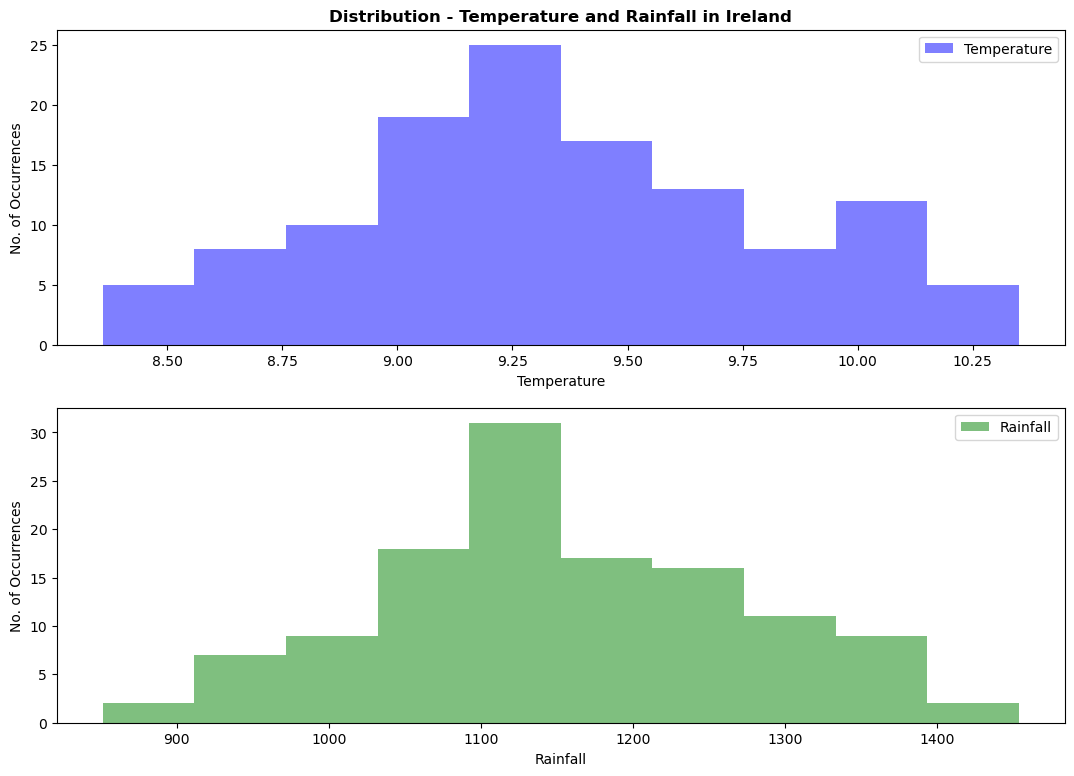

In [629]:
fig, axes = plt.subplots(2, figsize = (13,9))  # to create two vertically stacked subplots

axes[0].set_title("Distribution - Temperature and Rainfall in Ireland", fontweight='bold')
axes[0].set(xlabel='Temperature')
axes[0].set(ylabel="No. of Occurrences")
axes[0].hist(CompleteIrishTemperaturesfrom1900['Annual Mean Temperature '], bins=10, alpha=0.5, label="Temperature", color='blue')
axes[0].legend(loc='upper right')

axes[1].set(xlabel='Rainfall')
axes[1].set(ylabel="No. of Occurrences")
axes[1].hist(CompleteRainDatafrom1901['Annual Mean Precipitation '], bins=10, alpha=0.5, label="Rainfall", color='green')
axes[1].legend(loc='upper right')

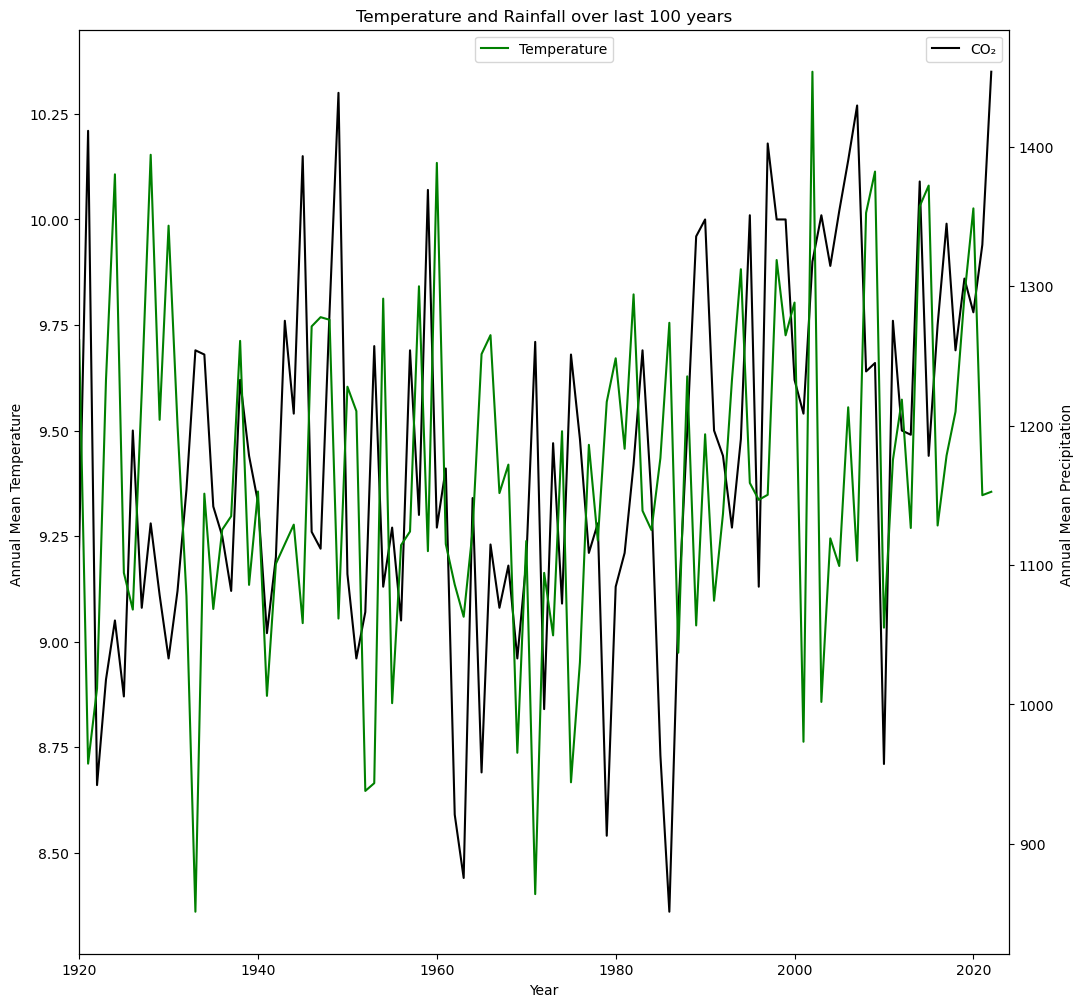

In [630]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sea.lineplot(x="Year", y="Annual Mean Temperature ", data=CompleteIrishTemperaturesfrom1900, color="black", ax=ax1, label="CO₂")
sea.lineplot(x="Year", y="Annual Mean Precipitation ", data=CompleteRainDatafrom1901, color="g", ax=ax2, label="Temperature")
ax1.set_xlim(1920, 2024)
ax2.set_xlim(1920, 2024)
plt.title("Temperature and Rainfall over last 100 years")
plt.legend(loc='upper center')

# regression & time lags
